# Analyzing Chicago Crime Data

The main objective of this project is to understand crime in Chicago.In this notebook, I will perform exploratory data analysis (EDA) and visualizations on the data to get a better understanding of crimes in the Chicago area. For a little extra credit I will try to perform some type of machine learning on the data to see if I can predict future crimes. 

Questions of interest
- How has crime change over the years?
- Time of most crimes?
- Most common crime?
- Areas of most crimes?

The City of Chicago updates a list of all reported crimes annually. The records span from 2001 to present day. By analyzing crime data we may gain insight into the underlying causes of crimes, and be able to predict if future crimes occur. This is the power of data science and machine learning. 

## Dataset

The data set is available through the city of Chicago's website: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

It reflects reported incidents of crime (with exception of murders) that occurred in the City of Chicago from 2001 to present. 




In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
#import data

crimes1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)
crimes2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
crimes3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
#combine dataframes

crimes = pd.concat([crimes1,crimes2,crimes3],ignore_index=False,axis=0)


In [4]:
del crimes1
del crimes2
del crimes3

In [5]:
crimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [6]:
#delete columns we do not need

crimes.drop(['Unnamed: 0', 'Case Number', 'IUCR',
             'Updated On','Year', 'FBI Code', 'Beat',
             'Ward','Community Area', 'Location'],
            inplace=True, axis=1)

In [7]:
crimes.head(2)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,1136872.0,1936499.0,41.981913,-87.771996
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,3.0,1181027.0,1861693.0,41.775733,-87.611920


We have several columns of interest that will help us answer our questions. We can use the date column to explore patterns in time, the primary type and location description to investigate the relationship with time. We can also take a look at arrest compared to primary type to get an understanding of which crime leads to a arrest.

In [8]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 13 columns):
ID                      int64
Date                    object
Block                   object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
District                float64
X Coordinate            float64
Y Coordinate            float64
Latitude                float64
Longitude               float64
dtypes: bool(2), float64(5), int64(1), object(5)
memory usage: 562.4+ MB


In [9]:
crimes.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,1136872.0,1936499.0,41.981913,-87.771996
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,3.0,1181027.0,1861693.0,41.775733,-87.611920
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,3.0,1186023.0,1859609.0,41.769897,-87.593671
3,4673629,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False,16.0,1134772.0,1922299.0,41.942984,-87.780057
4,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,8.0,1152412.0,1864560.0,41.784211,-87.716745


In [10]:
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

In [11]:
crimes.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
Date,,,,,,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,1136872.0,1936499.0,41.981913,-87.771996
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,3.0,1181027.0,1861693.0,41.775733,-87.611920
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,3.0,1186023.0,1859609.0,41.769897,-87.593671
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False,16.0,1134772.0,1922299.0,41.942984,-87.780057
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,8.0,1152412.0,1864560.0,41.784211,-87.716745


In [12]:
crimes.shape

(6017767, 13)

In [13]:
crimes.drop_duplicates(subset='ID',inplace=True)

In [14]:
crimes.shape

(4336556, 13)

In [15]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4336556 entries, 2006-04-02 13:00:00 to 2016-05-03 23:38:00
Data columns (total 13 columns):
ID                      int64
Date                    datetime64[ns]
Block                   object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
District                float64
X Coordinate            float64
Y Coordinate            float64
Latitude                float64
Longitude               float64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 405.3+ MB


In [16]:
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)
#type_to_change = list(crimes['Primary Type'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'
#crimes.loc[crimes['Primary Type'].isin(type_to_change) , crimes.columns=='Primary Type'] = 'OTHER'

In [17]:
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

In [18]:
crimes.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
Date,,,,,,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,1136872.0,1936499.0,41.981913,-87.771996
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,OTHER,SIDEWALK,True,False,3.0,1181027.0,1861693.0,41.775733,-87.611920
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,OTHER,OTHER,False,False,3.0,1186023.0,1859609.0,41.769897,-87.593671
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False,16.0,1134772.0,1922299.0,41.942984,-87.780057
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,8.0,1152412.0,1864560.0,41.784211,-87.716745


### How has crime changed over the years?

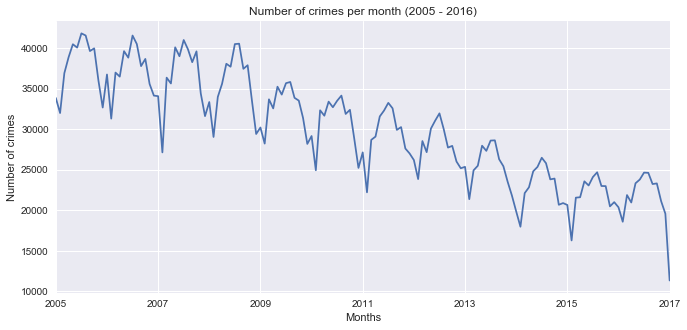

In [19]:
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2005 - 2016)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

The chart shows a pattern in the crimes over many years. This may indicate crime is a predictable activity. 

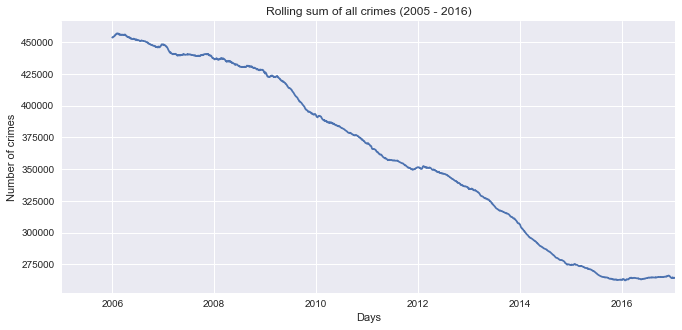

In [20]:
plt.figure(figsize=(11,5))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes (2005 - 2016)')
plt.xlabel('Days')
plt.ylabel('Number of crimes')
plt.show()

Calculating the rolling sum for each day we can see a decrease from 2006. However, when we reach around 2016 we can see crimes have been steady. We can conclude crime has been decreasing up to the year 2016. 

Rolling sum is just the sum of some amount over a fixed duration of time. For example, we calculate for each day the sum of crimes of the past year. If this rolling sum is decreasing than we know crimes are decreasing. 

Let see if we granduate our data by crime 

In [22]:
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size,
                                      columns = 'Primary Type',
                                      index=crimes.index.date, fill_value=0)


In [25]:
crimes_count_date.head(3)

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
2005-01-01,2,69,380,49,0,42,202,34,83,0,...,152,2,0,5,0,46,41,1,466,59
2005-01-02,0,57,193,43,0,9,118,60,27,1,...,83,23,0,4,0,28,4,0,198,6
2005-01-03,0,67,174,61,0,3,139,37,41,1,...,74,17,0,5,0,38,9,0,198,7


In [26]:
crimes_count_date.index= pd.DatetimeIndex(crimes_count_date.index)
crimes_count_date.index

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10',
               ...
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18'],
              dtype='datetime64[ns]', length=4401, freq=None)

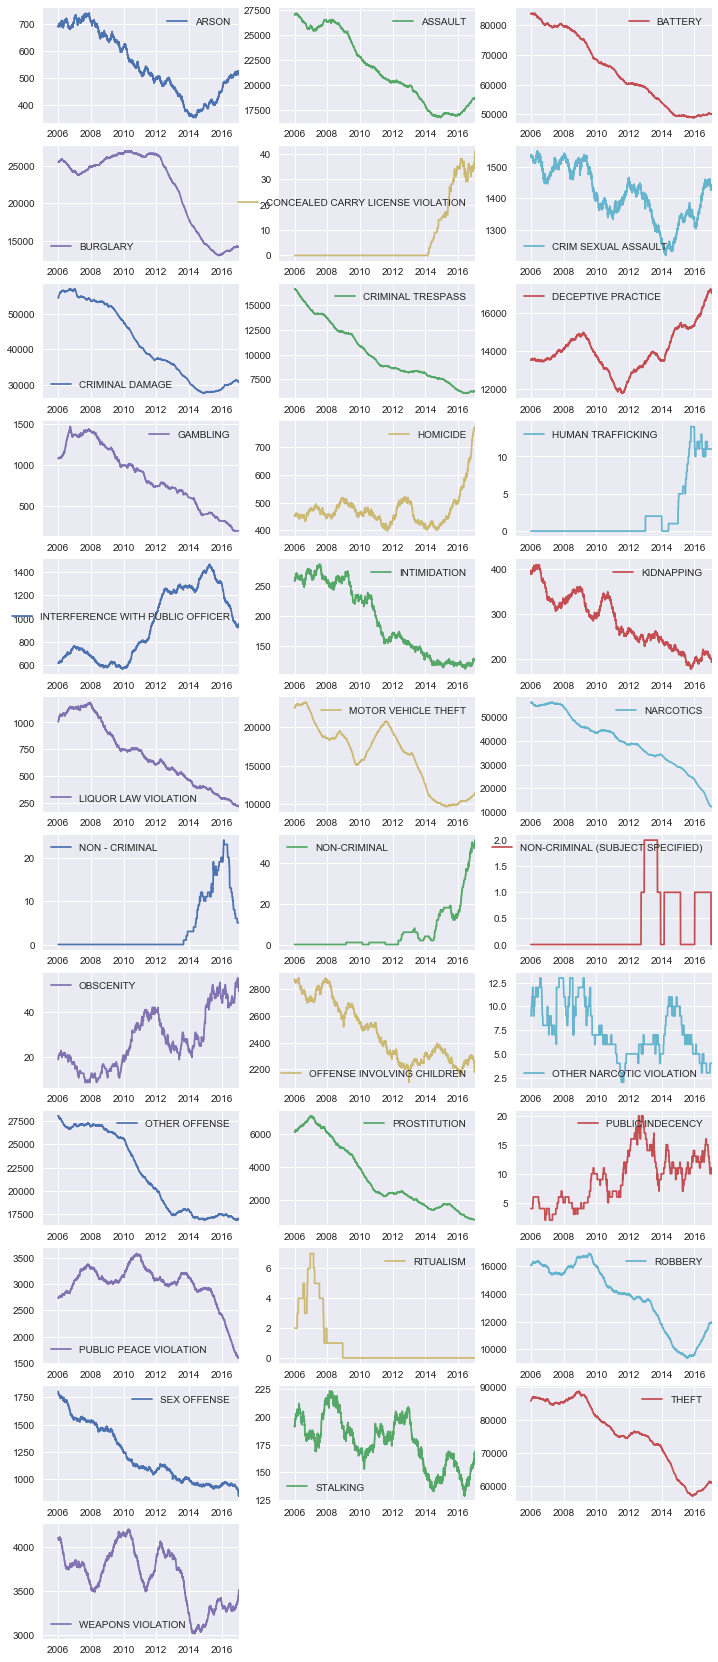

In [28]:
plot = crimes_count_date.rolling(365).sum().plot(figsize=(12,30),
                                                subplots=True,layout=(-1,3),
                                                sharex=False,sharey=False)

We dcan see some crime types are increasing like homicide, decpetive practices, and human trafficing. This may indicate why between 2015 and 2016 crimes have been stagnant. 

### Analyzing crime trends

Crimes are different, more violent crimes are committed less often than petty crimes. Therefore it may be beneficial to analyze crime based off time and location.

#### Crimes by day

Lets first analyze the difference in crime between days of the week. Are more crimes committed during weekends than weekdays?

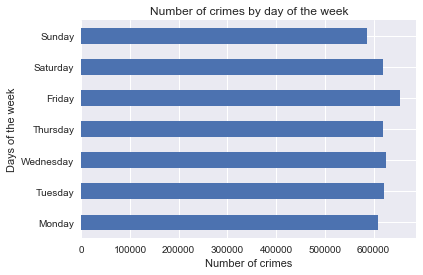

In [29]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

Based off the graph, I can see no notable difference between days. With Friday having slightly more crimes committed. But if doesn't really tell us much.

#### Crimes by month

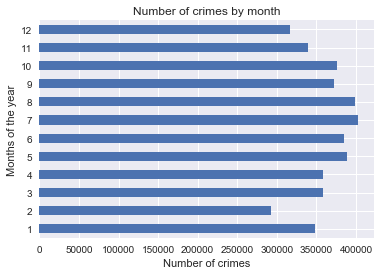

In [30]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month')
plt.show()

From our graph we can see crimes peak during the middle of the year. This indicates crimes peak in the summer months. 

### Most common crime